## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizio 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


In [62]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import SolveTriangular
import scipy.linalg as spl

dati = loadmat('test_06_05_2024.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"] 
b=b.astype(float)

dimensioni matrice A = 400 x 400


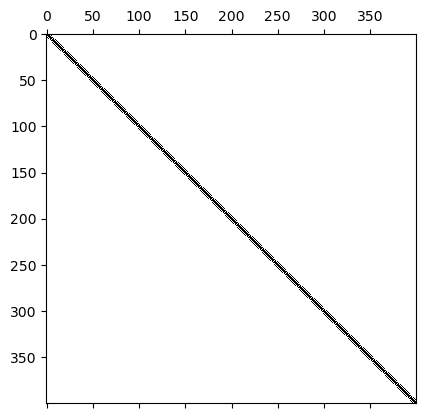

In [63]:
# Scelta del metodo in base alla matrice
m, n = A.shape
print(f'dimensioni matrice A = {m} x {n}')
plt.spy(A)

In [64]:
print("matrice A quadrata e di grande dimensioni")
# controllo se è sparsa o densa
if (np.count_nonzero(A) * 100 / (m*n)) < 33:
    print("matrice A sparsa")
else: print("matrice A densa")

matrice A quadrata e di grande dimensioni
matrice A sparsa


In [65]:
if np.all(A == A.T): 
    print("matrice A simmetrica")
    if np.all(npl.eigvals(A) > 0): 
        print("matrice A definita positiva")
    else: print("matrice A non definita positiva")
else: print("matrice A non simmetrica")

matrice A simmetrica
matrice A definita positiva


Poiché la matrice è quadrata, di grandi dimensioni e sparsa, scelgo tra i metodi iterativi. In particolare, essendo simmetrica e definita positiva, implemento il metodo steepest descent e conjugate gradient. 

In [66]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0   
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore >= tol and it < itmax: 
        it=it+1
        Ap = A @ p       
        alpha = -(r.T @ p) / (p.T @ Ap)                 
        x = x + alpha * p         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap = A@p
        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma = (r.T @ r) / rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = r + gamma * p
   
    
    return x,vet_r,vec_sol,it

In [67]:
tol = 1e-6
itmax = 400
x0 = np.array([0] * n).T
x_st, vet_r_st, vec_sol_st, it_st = steepestdescent(A,b,x0,itmax,tol)
print(f'Soluzione con steepest_descent x = {x_st} in {it_st} iterazioni')


Soluzione con steepest_descent x = [[0.99999981 0.99999981 0.99999981 ... 0.99999981 0.99999981 0.99999981]
 [1.00000012 1.00000012 1.00000012 ... 1.00000012 1.00000012 1.00000012]
 [1.00000012 1.00000012 1.00000012 ... 1.00000012 1.00000012 1.00000012]
 ...
 [1.00000012 1.00000012 1.00000012 ... 1.00000012 1.00000012 1.00000012]
 [1.00000012 1.00000012 1.00000012 ... 1.00000012 1.00000012 1.00000012]
 [0.99999981 0.99999981 0.99999981 ... 0.99999981 0.99999981 0.99999981]] in 62 iterazioni


In [68]:
x_conj, vet_r_conj, vec_sol_conj, it_conj = conjugate_gradient(A,b,x0,itmax,tol)
print(f'Soluzione con conjugate_gradient x = {x_conj} in {it_conj} iterazioni')

Soluzione con conjugate_gradient x = [[0.99999998 0.99999998 0.99999998 ... 0.99999998 0.99999998 0.99999998]
 [1.00000001 1.00000001 1.00000001 ... 1.00000001 1.00000001 1.00000001]
 [1.00000001 1.00000001 1.00000001 ... 1.00000001 1.00000001 1.00000001]
 ...
 [1.00000001 1.00000001 1.00000001 ... 1.00000001 1.00000001 1.00000001]
 [1.00000001 1.00000001 1.00000001 ... 1.00000001 1.00000001 1.00000001]
 [0.99999998 0.99999998 0.99999998 ... 0.99999998 0.99999998 0.99999998]] in 24 iterazioni


Si nota che il metodo del gradiente coniugato ottiene la medesima soluzione con un numero di iterazioni molto più basso. Infatti, nel metodo del gradiente coniugato, il vettore direzione è variato di una certa quantità gamma, in maniera tale che le direzioni di discesa siano coniugate rispetto a tutte le precedenti direzioni.

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

Per applicare Gauss senza pivotaggio (Gauss semplice), è necessario che: 
- la matrice sia ben condizionata
- la matrice sia non singolare, cioè abbia determinante != 0

In [69]:
def Gauss(A, b): 
    # Passo 1: Fattorizzazione LU di A
    P, L, U = spl.lu(A) 

    # Passo 2: Risoluzione del sistema Ly = Pb
    y,flag=SolveTriangular.Lsolve(L,P@b) 
    if flag==0: # soluzione trovata con successo
        # Passo 3: Risoluzione del sistema Ux = y
        x,flag=SolveTriangular.Usolve(U,y) 
    else:
        return None,None
    return x,flag

## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

In [70]:
import math

In [71]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xzeri[0:j], xzeri[j+1, n])

    num = np.poly(xzeri) 
    den = np.polyval(num, xnodi[j])
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """
     funzione che determina in un insieme di punti il valore del polinomio
     interpolante ottenuto dalla formula di Lagrange.
     DATI INPUT
        x  vettore con i nodi dell'interpolazione
        f  vettore con i valori dei nodi 
        xx vettore con i punti in cui si vuole calcolare il polinomio
     DATI OUTPUT
        y vettore contenente i valori assunti dal polinomio interpolante
        """
     n = x.size
     m = xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(L, j)
        L[:,j]= np.polyval(p, xx)   
    
     return L@y

In [72]:
def zeri_chebichev(a, b, n):
    membro_1 = (a + b) / 2
    membro_2 = (b - a) / 2
    x = np.zeros((n+1,))

    for i in range(n):
        x[i] = membro_1 + membro_2 * np.cos(((2 * i + 1) * math.pi) / (2 * (n + 1)))
    return x

In [73]:
n = 15
a = -1
b = 1

x_eq = np.linspace(a, b, n+1)
x_cheb = zeri_chebichev(a, b, n)
xx = np.linspace(a, b, 100)

f = lambda x: 1/(1+25*x**2)
y_eq = f(x_eq)
y_cheb = f(x_cheb)
y_fun = f(xx)



- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

In [1]:
""" 
Calcolare l'errore di interpolazione r(x) =  f(x)-pe(x),
tra la funzione test $f(x)$ e il polinomio di interpolazione pe(x) calcolato a partire da nodi equidistanti.
"""
pe = InterpL(x_eq, y_eq, xx)
r = lambda x: f(x) - pe(x)

NameError: name 'InterpL' is not defined

**Domanda AI**

1. Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP). (Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**


Un neurone artificiale, detto percettrone, riceve degli input, i0, i1, ..., in, ai quali sono associati dei pesi (w1, w2, ..., wn), tra cui in particolare si ricorda w0, il bias, cioè un peso collegato a un input fittizio con valore sempre pari a 1, che viene utilizzato per tarare il punto di lavoro ottimale del neurone. 
La funzione di attivazione f determina il comportamento del neurone, cioè il suo output z. Essa simula il comportamento del neurone biologico di attivarsi solo se i segnali in ingresso superano una certa soglia. 
Un MLP (multilayer perceptron) è costituito da più layer di neuroni: tipicamente si ha 1 input layer, 1 o più hidden layer, e 1 output layer.

Nella fase di forward propagation, i dati in input vengono propagati strato per strato attraverso la rete. Per ogni neurone si calcola la funzione di attivazione.
Nella fase di backward propagation, si calcolano i gradienti della funzione di perdita rispetto a ciascun peso della rete, utilizzando la chain rule per il calcolo differenziale.

2. Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**

Al fine di non rimanere bloccati in un punto di minimo locale, è necessario che la loss function sia convessa. Infatti, questo assicura che il punto di minimo trovato con il metodo del gradiente sia globale e non locale. La funzione costo priva di hidden layer è convessa. Qualora si aggiungano hidden layer, si incorre in una maggiore facilità di imbattersi in punti di sella o minimi locali.


Il metodo della discesa del gradiente con momentum è stato studiato per accelare la convergenza e aiutare l'algoritmo a ridurre le oscillazioni. 
w(k+1) = wk + l.r.*vk, dove vk = velocità accumulata al passo precedente, la quale serve pper aumentare le dimensioni degli aggiornamenti quando i gradienti puntano nella stessa direzione, mentre le riduce se i gradienti puntano in senso opposto. 

3. Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**


Step decay: riduce il learning rate per ogni epoca di un fattore delta
Decadimento esponenziale: varia in base alle iterazioni, seguendo la regola: lr = lr * e**(-kt)
Decadimento basato sul tempo: divide il learning rate iniziale in base al numero di iterazioni eseguite. 

Se il learning rate viene scelto troppo elevato, allora si rischia di non convergere mai alla soluzione del problema. D'altra parte, qualora si scelga un learning rate troppo basso, si giunge alla soluzione del problema in un numero di iterazioni troppo elevate.
Dunque, la scelta migliore consiste nell'avere un learning rate dinamico che nelle fasi di ricerca è medio alto, mentre nelle fasi finali è basso.

Adagrad = adatta il learning rate ai parametri, eseguendo aggiornamenti grandi ai parametri poco frequenti, e viceversa.In questo modo, il learning rate si adatta alle caratteristiche dei dati e del modello. Tuttavia, si ha l'accumulo di gradienti quadrati, che può portare a un learning rate molto basso. 

RMSProp = deriva da adagrad, con la differenza che migliora la parte di accumulto del gradiente con una media ponderata esponenziale dei gradienti al quadrato. 

Adadelta = come RMSProp, mma non richiede di impostare un learning rate iniziale, dato che utilizza la quantità di cambiamento stessa come calibrazione per i cambiamenti successivi. 

Adam = utilizza RMSProp e il metodo del gradiente con momentum. 